# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|--------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


### Following Code blocks present in original notebook.

#### The document '2_DonorsChoose_EDA_TSNE' is renamed So lot of code blocks are not written by me. If a group of code blocks written by me it was mentioned at beggining of them. Observations under charts are written by me (ilmnarayana). **me = ilmnarayana ( I L M Narayana)**.

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [9]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [10]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [11]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


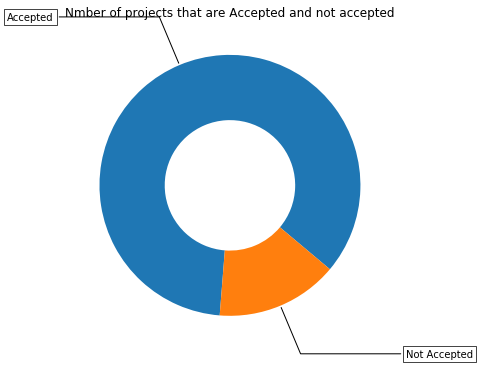

In [12]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

**Observation:** From above chart we can say that our data is unbalanced data. Nearly 84.86% of data is approved.

### 1.2.1 Univariate Analysis: School State

In [13]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620
'''
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
''''''

''

In [14]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [15]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [16]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

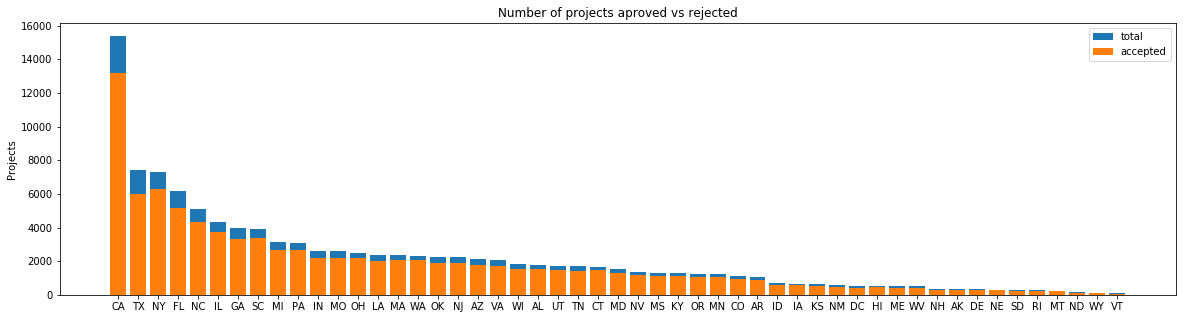

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [17]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

**Observation:** From above chart we can see state code having CA have lot of projects and the approval rate is affected by school_state slightly even though Every state has more than 80% approval rate.

### 1.2.2 Univariate Analysis: teacher_prefix

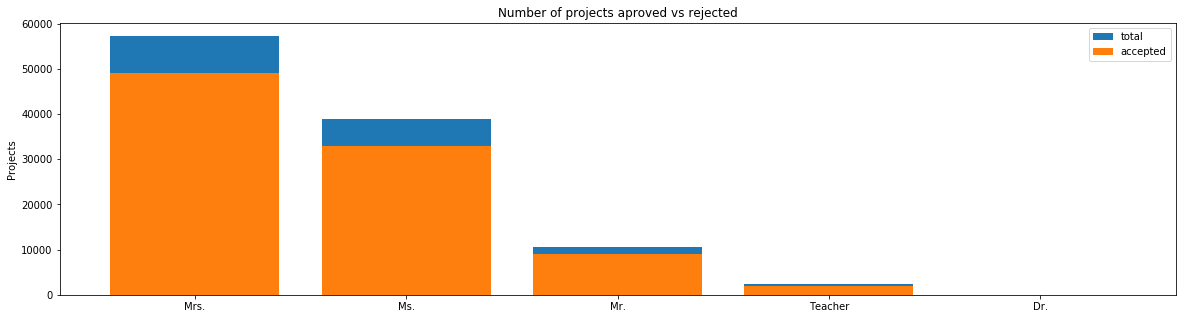

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [18]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

**Observation:** From above chart we see teachers with 'Mrs.' prefix have a lot number of projects and also has high approval rate. and the approval rate varies significantly from ~70% to ~85%

### 1.2.3 Univariate Analysis: project_grade_category

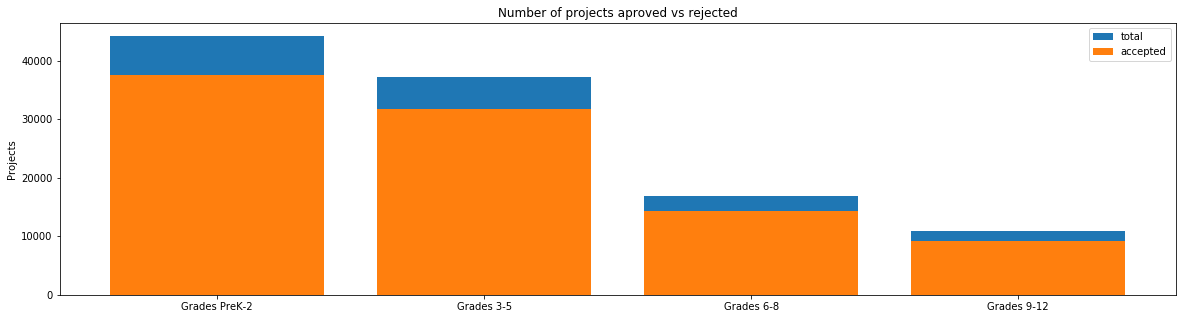

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [19]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**Observation:** Approval rate didn't have much variation. But as grade increases number of projects are decreasing.

### 1.2.4 Univariate Analysis: project_subject_categories

In [20]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [21]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

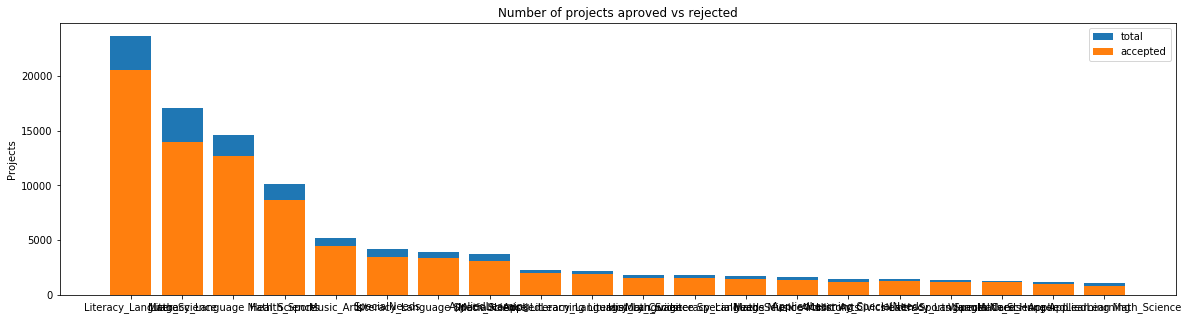

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [22]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [23]:
# Code written by me.
categories_grp = project_data.groupby(by='clean_categories')['project_is_approved']
count_of_categories = categories_grp.count()
list_of_good_cats = count_of_categories[count_of_categories>100].index.tolist()
mean_of_categories = categories_grp.mean()
mean_of_categories = mean_of_categories.loc[list_of_good_cats]
print(f"Lowest approval rate is {mean_of_categories.min()} for '{mean_of_categories.argmin()}' category")
print(f"Highest approval rate is {mean_of_categories.max()} for '{mean_of_categories.argmax()}' category")

Lowest approval rate is 0.7874396135265701 for 'Math_Science Health_Sports' category
Highest approval rate is 0.9258976317799847 for 'Warmth Care_Hunger' category


**Observation:** There are lot of Literacy_Language projects than other subject categories. And the approval rate also varies with category type. It varies from ~78.7% to ~95.6%. categories with less number of data are removed as they give 0% and 50% which may affect the actual range.

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

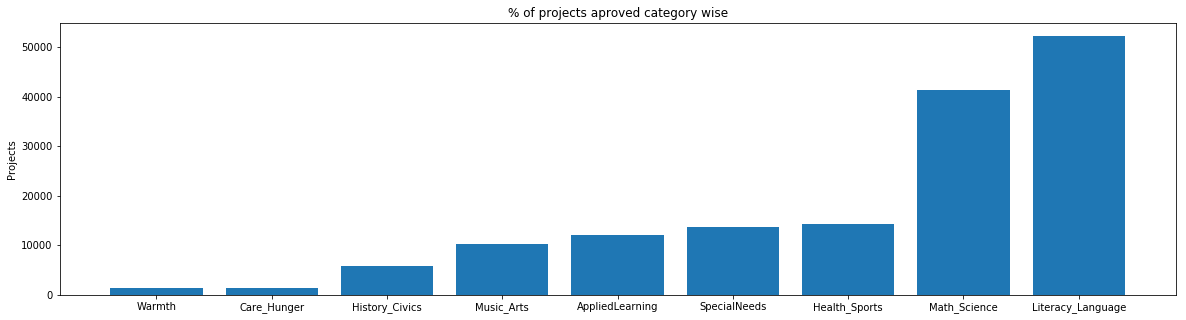

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

**Observation:** As seen in above observation there are lot of projects with Literacy_Language and also Math_Science has good amount of projects. But remaining categories don't have good amount of projects.

In [26]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [27]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [28]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

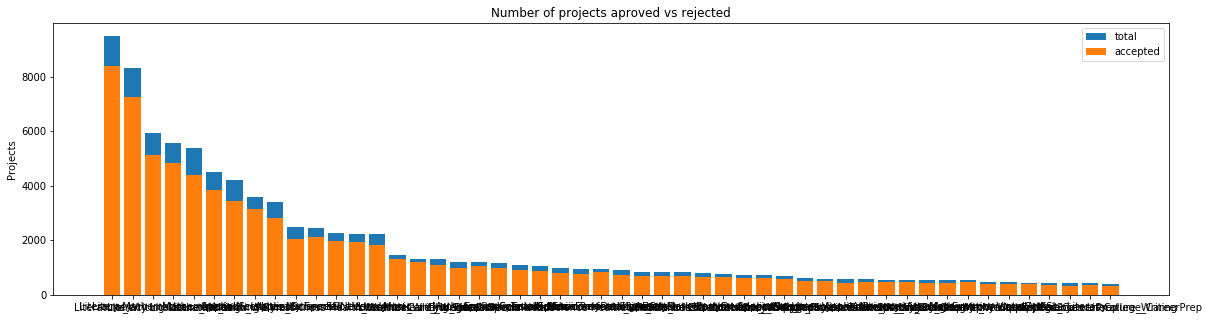

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [29]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [30]:
# Code written by me.
subcategories_grp = project_data.groupby(by='clean_subcategories')['project_is_approved']
count_of_subcategories = subcategories_grp.count()
list_of_good_subcats = count_of_subcategories[count_of_subcategories>100].index.tolist()
mean_of_subcategories = subcategories_grp.mean()
mean_of_subcategories = mean_of_subcategories.loc[list_of_good_subcats]
print(f"Lowest approval rate is {mean_of_subcategories.min()} for '{mean_of_subcategories.argmin()}' category")
print(f"Highest approval rate is {mean_of_subcategories.max()} for '{mean_of_subcategories.argmax()}' category")

Lowest approval rate is 0.7396449704142012 for 'EarlyDevelopment VisualArts' category
Highest approval rate is 0.9258976317799847 for 'Warmth Care_Hunger' category


**Observation:** There are lot of Literacy and Mathematics projects than other subject subcategories. And the approval rate also varies a lot with category type. It varies from ~74% to ~92.6%. subcategories with less data are not considered as they give 0% and 100% which may affect the actual range.

In [31]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

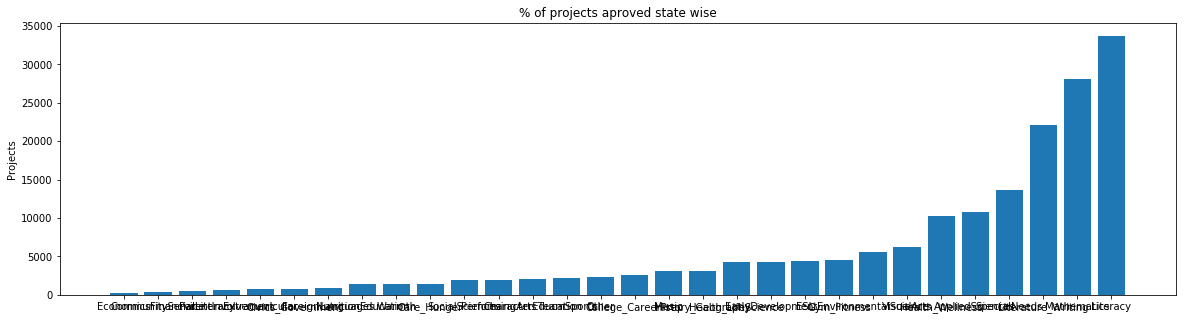

In [32]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

**Observation:** As seen in above observation there are lot of Literacy and Mathematics (and Literature_Writing) projects. And remaining categories don't have good amount of projects.

In [33]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

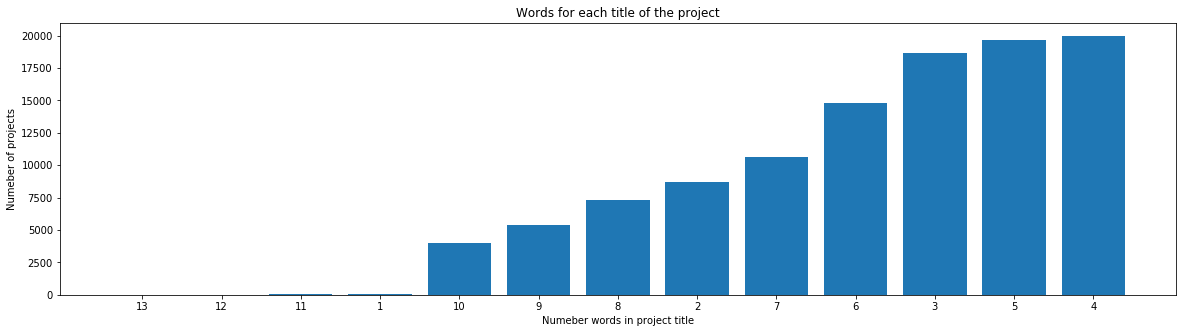

In [34]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**Observation:** typical number of words in titles are in 3-6 range. and some outliers are there where there is only one word and 11-13 words in titles.

In [35]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

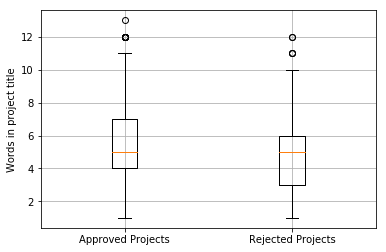

In [36]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

**Observation:** Although medians are same for both approved and rejected projects, there is some shift towards high number of 'words in project title' in approved projects. And same shift can be observed in rejected projects but towards low number od 'words in project title'. This may suggest that high word count can favour approval.

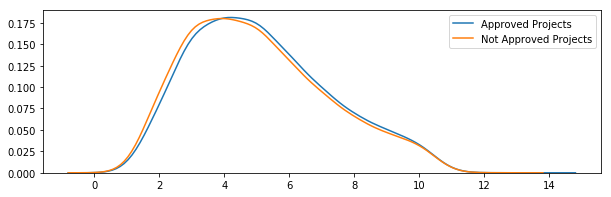

In [37]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observation:** As discussed above here we can see the shift more clearly even though this shift is very less.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [38]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [39]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

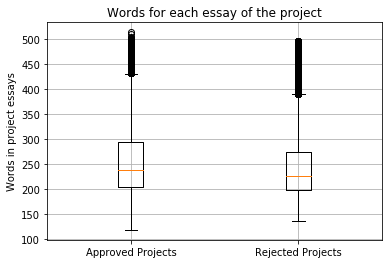

In [40]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

**Observation:** We may not see much here but we can see approved projects have slightly high median than rejected ones. median here refers to median of number of words in project Essay.

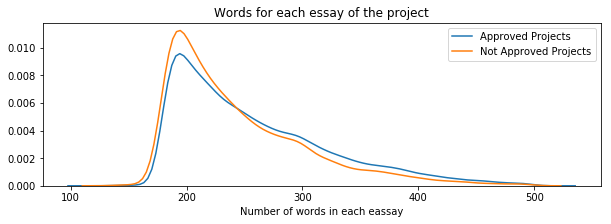

In [41]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

**Observation:** We can see that After certain number, high number of words in project Essay slightly favours our approval.

### 1.2.8 Univariate Analysis: Cost per project

In [42]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [43]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [44]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [45]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

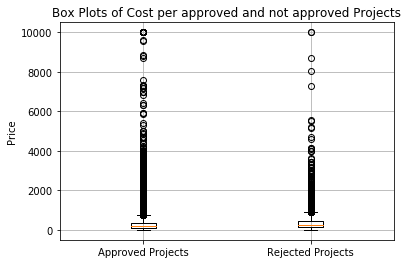

In [46]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

**Observation:** We cant say anything about data outside quartiles as they are not clear. but the median of rejected projects seems to be slightly higher than approved projects. here median refers to median of Cost of the project.

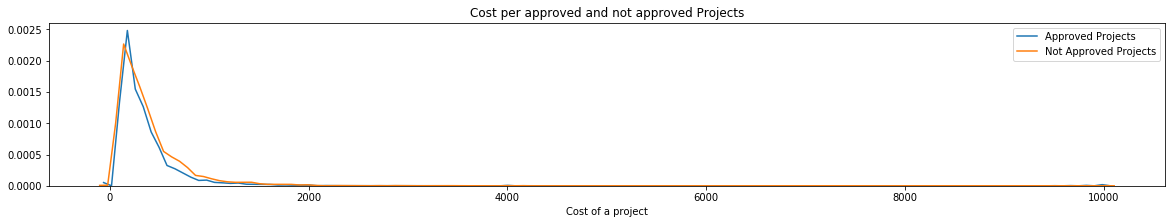

In [47]:
plt.figure(figsize=(20,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

**Observation:** This graph also doesn't give much. But In certain range you can observe blue line is behind orange line which may suggest lower cost in project may favour approval.

In [48]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

**Observation:** Here we can clearly observe that for all percentiles the approved projects have less Cost than rejected projects.

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

### Following Code blocks provided by me.

In [49]:
project_data['teacher_number_of_previously_posted_projects'].head()

0    0
1    7
2    1
3    4
4    1
Name: teacher_number_of_previously_posted_projects, dtype: int64

In [50]:
prev_projects_approved = project_data[project_data['project_is_approved']==1]\
                         ['teacher_number_of_previously_posted_projects'].values
prev_projects_rejected = project_data[project_data['project_is_approved']==0]\
                         ['teacher_number_of_previously_posted_projects'].values

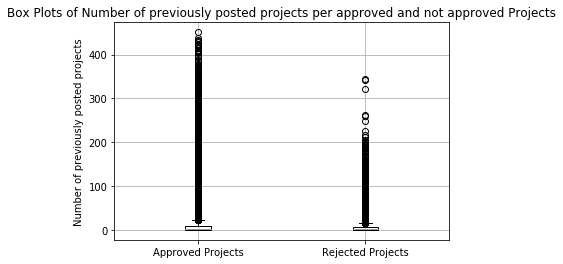

In [51]:
# Code took from original code provided.
plt.boxplot([prev_projects_approved, prev_projects_rejected])
plt.title('Box Plots of Number of previously posted projects per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of previously posted projects')
plt.grid()
plt.show()

**Observation:** From Box plot we cant clearly see the medians but we can see a lot of Approved projects have large number of previously posted projects. (i.e. Range of values for approved and rejected are different)

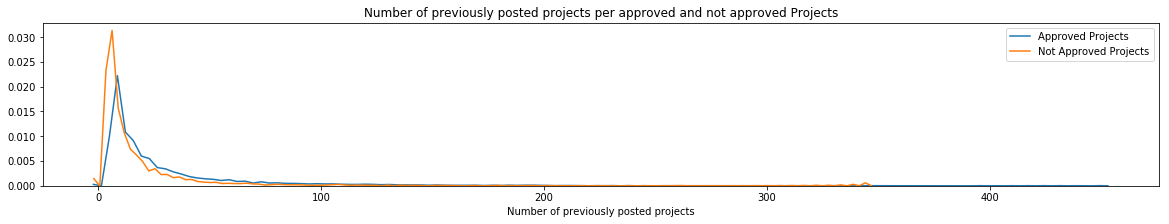

In [52]:
# Code took from original code provided.
plt.figure(figsize=(20,3))
sns.distplot(prev_projects_approved, hist=False, label="Approved Projects")
sns.distplot(prev_projects_rejected, hist=False, label="Not Approved Projects")
plt.title('Number of previously posted projects per approved and not approved Projects')
plt.xlabel('Number of previously posted projects')
plt.legend()
plt.show()

**Observation:** Here we can see projects with high number of previously posted projects have slightly more chance for approval than that have less.
And let us see their maximums to see a threshold for being approved.

In [53]:
print('Maximum number of previously posted projects in Approved projects:', prev_projects_approved.max())
thre = prev_projects_rejected.max()
print('Maximum number of previously posted projects in Rejected projects:', thre)
print(len(prev_projects_approved[prev_projects_approved > thre]))

Maximum number of previously posted projects in Approved projects: 451
Maximum number of previously posted projects in Rejected projects: 345
66


**Observation:** We see projects having above 345 are approved. and there are 66 of them.

In [54]:
# Code took from original code provided.
x = PrettyTable()

x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]
for i in range(0, 101, 5):
    x.add_row([i, np.round(np.percentile(prev_projects_approved, i)), np.round(np.percentile(prev_projects_rejected, i))])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

**Observation:** Here we can see at every percentile Approved projects have more number of previously posted projects.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

**Doing analysis on presence of numerical digits in project resource summary**

In [55]:
# ref: https://stackoverflow.com/questions/4138202/using-isdigit-for-floats
def nums_in_str(text):
    """
    Returns list of numbers present in the given string. Numbers := floats ints etc.
    """
    result = []
    for s in text.split():
        try:
            x = float(s)
            result.append(x)
        except:
            continue
    return result

In [56]:
print(nums_in_str('HE44LLo 56 are -89 I 820.353 in -78.39 what .293 about 00'))

[56.0, -89.0, 820.353, -78.39, 0.293, 0.0]


In [57]:
numbers_in_summary = np.array([len(nums_in_str(s)) for s in project_data['project_resource_summary']])
numbers_in_summary_approved = np.array([len(nums_in_str(s)) for s in \
                                       project_data[project_data['project_is_approved']==1]['project_resource_summary']])
numbers_in_summary_rejected = np.array([len(nums_in_str(s)) for s in \
                                       project_data[project_data['project_is_approved']==0]['project_resource_summary']])

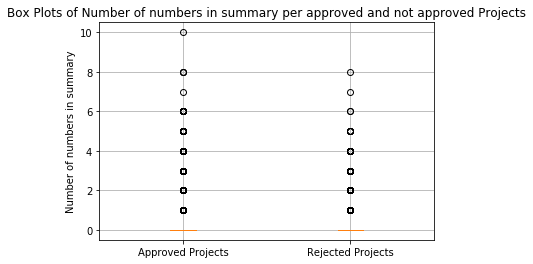

In [58]:
# Code took from original code provided.
plt.boxplot([numbers_in_summary_approved, numbers_in_summary_rejected])
plt.title('Box Plots of Number of numbers in summary per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of numbers in summary')
plt.grid()
plt.show()

**Observation:** It seems like lot of the summaries have no numbers in them as median and even 75th percentile of both approved and rejected are 0. Lets check percentage of summaries having numbers in them.

In [59]:
perc_total = len(numbers_in_summary[numbers_in_summary>0]) * 100 / len(numbers_in_summary)
perc_appr = len(numbers_in_summary_approved[numbers_in_summary_approved>0]) * 100 / len(numbers_in_summary_approved)
perc_reje = len(numbers_in_summary_rejected[numbers_in_summary_rejected>0]) * 100 / len(numbers_in_summary_rejected)
print('Percentage of summaries having numbers:', str(np.round(perc_total, 3))+'%')
print('Percentage of Approved summaries having numbers:', str(np.round(perc_appr, 3))+'%')
print('Percentage of Rejected summaries having numbers:', str(np.round(perc_reje, 3))+'%')

Percentage of summaries having numbers: 10.458%
Percentage of Approved summaries having numbers: 11.118%
Percentage of Rejected summaries having numbers: 6.759%


**Observation:** So percentage of summaries having numbers in approved projects is more than in rejected projects. Lets see the probability of being accepted if a summary have numbers in them (by calculating percentage) and also plot PDF's for both approved and rejected.

In [60]:
perc = len(numbers_in_summary_approved[numbers_in_summary_approved>0]) * 100 / len(numbers_in_summary[numbers_in_summary>0])
print('Percentage of projects that are approved which have numbers in thier summary:', str(np.round(perc, 3))+'%')

Percentage of projects that are approved which have numbers in thier summary: 90.214%


**Observation:** Now from this percentage, we get more confident to say that having numbers in summary does effect our approval. Where in previous values, the total number of projects effects the percentage (which is low) as there are lot of summaries with no numbers in them.<br>
Although we have to keep in mind that overall approval probability is around 85% So 90% is not as high as it seems to be, as our data is already biased.

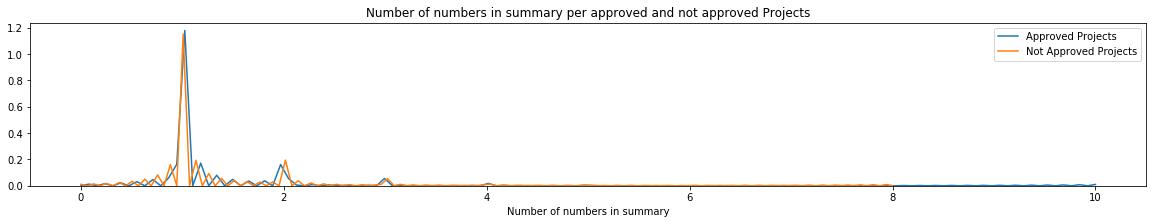

In [61]:
# Code took from original code provided.
plt.figure(figsize=(20,3))
sns.distplot(numbers_in_summary_approved, hist=False, label="Approved Projects")
sns.distplot(numbers_in_summary_rejected, hist=False, label="Not Approved Projects")
plt.title('Number of numbers in summary per approved and not approved Projects')
plt.xlabel('Number of numbers in summary')
plt.legend()
plt.show()

**Observation:** The above PDF shows distribution for number of 'numbers in the summary' which may seem to not affect the Approval but having a number (doesn't matter how many) affects the approval.

Adding columns for further analysis.

In [62]:
project_data['numbers_in_summary'] = numbers_in_summary
project_data['summary_numeric_bool'] = numbers_in_summary>0

In [63]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2          ...           \
0  \"The limits of your language are the limits o...          ...            
1  The projector we need for our school is very c...          ...            

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price quantity  \
0  My students are English learners that are work...  154.6       23   
1  Our students arrive to our school eager to lea...  299.0        1   

   numbers_in_summary  summary_numeric_bool  
0                   0                 False  
1                   0                 False  

[2 rows x 22 columns]

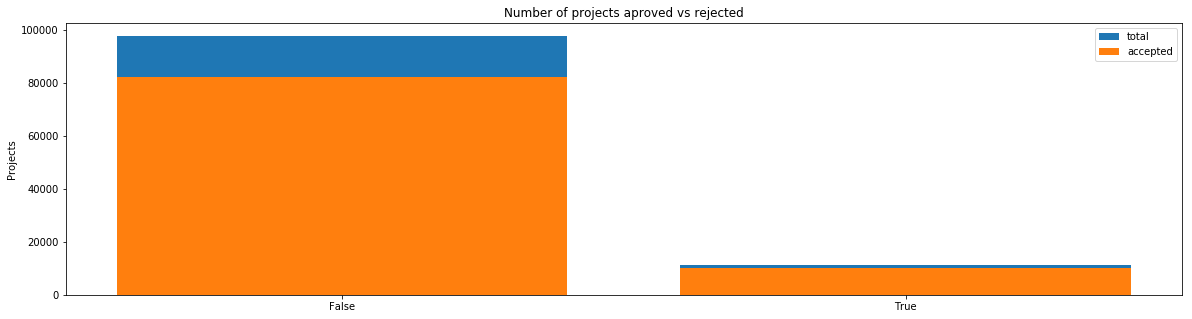

   summary_numeric_bool  project_is_approved  total       Avg
0                 False                82399  97823  0.842327
1                  True                10307  11425  0.902144
   summary_numeric_bool  project_is_approved  total       Avg
0                 False                82399  97823  0.842327
1                  True                10307  11425  0.902144


In [64]:
# function used from original code
univariate_barplots(project_data, 'summary_numeric_bool')

**Observation:** From above we see the numbers. Among 1,09,248 (i.e. 97823+11425) projects only 11,425 have numbers in thier summaries in which 10,307 are accepted. and only 1,118 are rejected.

**Analysis on number of words in summary text**

In [65]:
word_count_summary = np.array([len(s.split()) for s in project_data['project_resource_summary']])
word_count_summary_accepted = np.array([len(s.split()) for s \
                               in project_data[project_data['project_is_approved']==1]['project_resource_summary']])
word_count_summary_rejected = np.array([len(s.split()) for s \
                               in project_data[project_data['project_is_approved']==0]['project_resource_summary']])

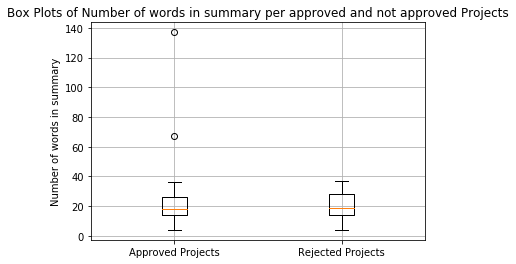

In [66]:
# Code took from original code provided.
plt.boxplot([word_count_summary_accepted, word_count_summary_rejected])
plt.title('Box Plots of Number of words in summary per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of words in summary')
plt.grid()
plt.show()

**Observation:** Didn't notice much difference in median or quariles but few approved projects have summaries with high word count.

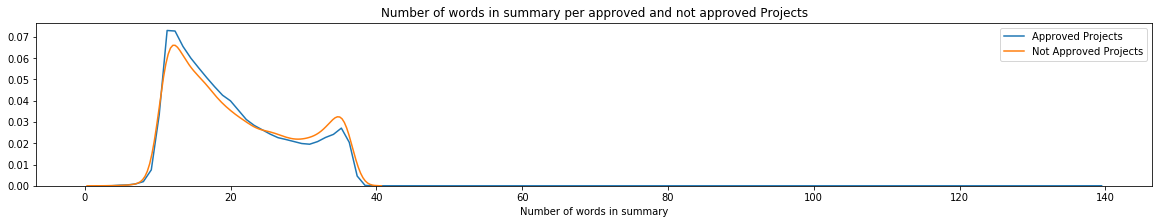

In [67]:
# Code took from original code provided.
plt.figure(figsize=(20,3))
sns.distplot(word_count_summary_accepted, hist=False, label="Approved Projects")
sns.distplot(word_count_summary_rejected, hist=False, label="Not Approved Projects")
plt.title('Number of words in summary per approved and not approved Projects')
plt.xlabel('Number of words in summary')
plt.legend()
plt.show()

**Observation:** Didn't notice good difference in PDF either. Although in some range projects with high word count summaires have slightly high Approval rate. That is not true for whole range (or wide range). But we can see some summaries have a lot of words which are approved. let us see how many are there.

In [68]:
thre = word_count_summary_rejected.max()
print(word_count_summary_accepted[word_count_summary_accepted>thre])

[137  67]


There are only 2 summaries with lot of words. These can be considered outliers as we have around 1,00,000 projects. From which we can summarize that number of words may not have significant effect the approval of projects.

### Following Code blocks present in original notebook.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [69]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2          ...           \
0  \"The limits of your language are the limits o...          ...            
1  The projector we need for our school is very c...          ...            

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price quantity  \
0  My students are English learners that are work...  154.6       23   
1  Our students arrive to our school eager to lea...  299.0        1   

   numbers_in_summary  summary_numeric_bool  
0                   0                 False  
1                   0                 False  

[2 rows x 22 columns]

In [70]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [71]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [72]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [73]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [74]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [75]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [76]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:46<00:00, 1026.22it/s]


In [77]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

### Following Code blocks provided by me.

In [78]:
# similarly you can preprocess the titles also
# Code took from original code provided.
# Also function used from original code.
preprocessed_titles = []

for sent in tqdm(project_data['project_title'].values):
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 28172.77it/s]


In [79]:
preprocessed_titles[50000]

'help bridgeport students improve their listening skills'

### Following Code blocks present in original notebook.

## 1. 4 Preparing data for models

In [80]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numbers_in_summary', 'summary_numeric_bool'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [81]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [82]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


### Following Code blocks provided by me.

In [83]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# Code took from original code provided.
states = project_data['school_state'].unique()
vectorizer = CountVectorizer(vocabulary=list(states), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding", school_state_one_hot.shape)

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of matrix after one hot encoding (109248, 51)


There are some NaN's in teacher_prefix column. replacing them with 'Mrs.' as that has high occurance in that column.

In [84]:
print("Number of NaN's before replacement in column: ", sum(project_data['teacher_prefix'].isna()))
project_data['teacher_prefix'] = project_data['teacher_prefix'].replace(np.nan, 'Mrs.', regex=True)
print("Number of NaN's after replacement in column: ", sum(project_data['teacher_prefix'].isna()))

# Output may show both zeros as I re-run this several times. But there are 3 zeros in original column.

Number of NaN's before replacement in column:  3
Number of NaN's after replacement in column:  0


In [85]:
# Code took from original code provided.
prefixes = project_data['teacher_prefix'].unique()
vectorizer = CountVectorizer(vocabulary=list(prefixes), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encoding", teacher_prefix_one_hot.shape)

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
Shape of matrix after one hot encoding (109248, 5)


In [86]:
grades = project_data['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grades), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding", project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encoding (109248, 4)


### Following Code blocks present in original notebook.

### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [87]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [88]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [89]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [90]:
# Code took from original code provided.
# We are considering only the words which appeared in at least 5 documents(rows or projects).
# Reduced number as title has less words
vectorizer = CountVectorizer(min_df=5)
titles_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ", titles_bow.shape)

Shape of matrix after one hot encodig  (109248, 5107)


### Following Code blocks present in original notebook.

#### 1.4.2.3 TFIDF vectorizer

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [92]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [93]:
# Code took from original code provided.
vectorizer = TfidfVectorizer(min_df=5)
titles_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 5107)


### Following Code blocks present in original notebook.

#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [95]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [96]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:05<00:00, 1668.35it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [97]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [98]:
# Code took from original code provided.
avg_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    cnt_words =0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 44772.28it/s]


109248
300


### Following Code blocks present in original notebook.

#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [99]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [100]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [06:24<00:00, 284.41it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [101]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [102]:
# Code took from original code provided.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [103]:
# Code took from original code provided.
tfidf_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    tf_idf_weight =0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 20218.47it/s]


109248
300


### Following Code blocks present in original notebook.

### 1.4.3 Vectorizing Numerical features

In [104]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [105]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### Following Code blocks provided by me.

In [106]:
# Code took from original code provided
scalar = StandardScaler()
scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(f"Mean : {scalar.mean_[0]}, Standard deviation : {np.sqrt(scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_projects_standardized = \
                scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(previously_posted_projects_standardized)

Mean : 11.153165275336848, Standard deviation : 27.77702641477403
[[-0.40152481]
 [-0.14951799]
 [-0.36552384]
 ...
 [-0.29352189]
 [-0.40152481]
 [-0.40152481]]


### Following Code blocks present in original notebook.

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [107]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [108]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

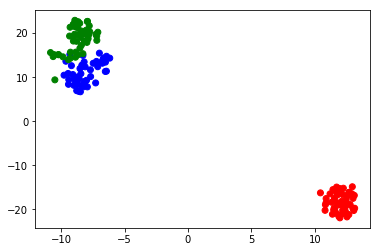

In [109]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

### Following Code blocks provided by me.

Combining all categorical and numerical columns into one table for future use.

In [110]:
# Categorical Data - one hot encoded
print(school_state_one_hot.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(project_grade_category_one_hot.shape)
# Numerical Data - Standardized
print(price_standardized.shape)
print(previously_posted_projects_standardized.shape)

(109248, 51)
(109248, 9)
(109248, 30)
(109248, 5)
(109248, 4)
(109248, 1)
(109248, 1)


In [111]:
# Code took from original code provided
categ_numer_data = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot,\
                           teacher_prefix_one_hot, project_grade_category_one_hot, price_standardized,\
                           previously_posted_projects_standardized))
print(categ_numer_data.shape)

(109248, 101)


In [112]:
class_label_data = np.array(project_data['project_is_approved']).reshape(-1, 1)
print(class_label_data.shape)

(109248, 1)


**As mentioned in this assignment description above I consider 'project_title' feature for t-SNE and neglecting Essay text data**

**Only taking first 6000 points in data due to memory Issues**

In [113]:
class_label_data = class_label_data[:6000, :]

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [114]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [115]:
print(titles_bow.shape)

(109248, 5107)


In [116]:
bow_X = hstack((categ_numer_data, titles_bow))
bow_X = bow_X.tocsr()[:6000, :]
bow_X = bow_X.todense()
print(bow_X.shape)

(6000, 5208)


In [117]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

bow_X_embedding = tsne.fit_transform(bow_X)

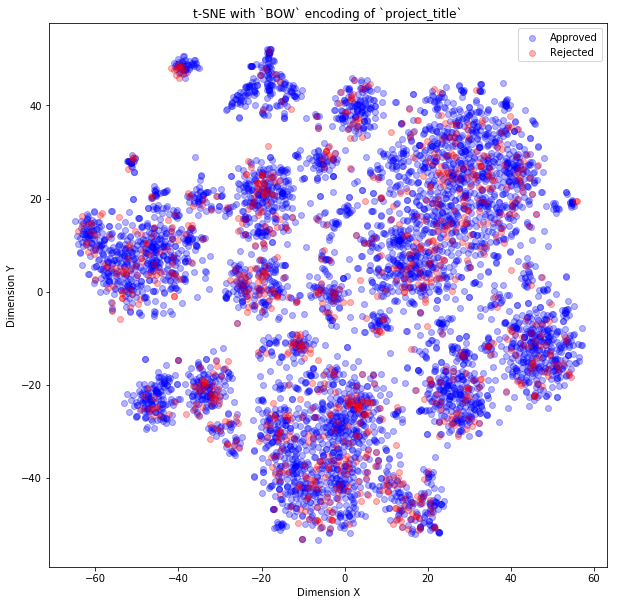

In [118]:
# Code took from original code provided
for_tsne = np.hstack((bow_X_embedding, class_label_data))
bow_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
tsne_df_0 = bow_tsne_df[bow_tsne_df['Score']==0]
tsne_df_1 = bow_tsne_df[bow_tsne_df['Score']==1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_df_1['Dimension_x'], tsne_df_1['Dimension_y'], c='blue', label='Approved', alpha=0.3)
ax.scatter(tsne_df_0['Dimension_x'], tsne_df_0['Dimension_y'], c='red', label='Rejected', alpha=0.3)
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.legend()
ax.set_title('t-SNE with `BOW` encoding of `project_title`')
plt.show()

**Observation:** Lot of overlap in the visualization. May be BOW is not a good method to visualize as lot of values are zeros in the matrix (i.e. Sparse matrix). Used Alpha in plot to see the overlap.

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [119]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [120]:
print(titles_tfidf.shape)

(109248, 5107)


In [121]:
tfidf_X = hstack((categ_numer_data, titles_tfidf))
tfidf_X = tfidf_X.tocsr()[:6000, :]
tfidf_X = tfidf_X.todense()
print(tfidf_X.shape)

(6000, 5208)


In [122]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

tfidf_X_embedding = tsne.fit_transform(tfidf_X)

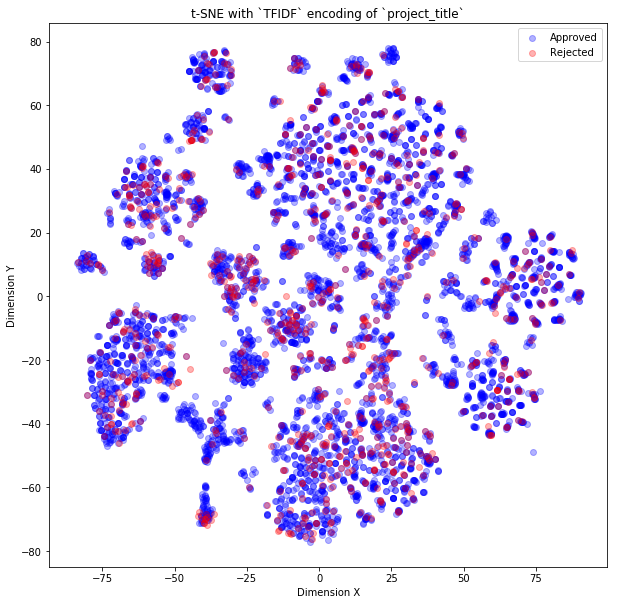

In [123]:
# Code took from original code provided
for_tsne = np.hstack((tfidf_X_embedding, class_label_data))
tfidf_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
tsne_df_0 = tfidf_tsne_df[tfidf_tsne_df['Score']==0]
tsne_df_1 = tfidf_tsne_df[tfidf_tsne_df['Score']==1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_df_1['Dimension_x'], tsne_df_1['Dimension_y'], c='blue', label='Approved', alpha=0.3)
ax.scatter(tsne_df_0['Dimension_x'], tsne_df_0['Dimension_y'], c='red', label='Rejected', alpha=0.3)
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.legend()
ax.set_title('t-SNE with `TFIDF` encoding of `project_title`')
plt.show()

**Observation:** This plot also has lot of overlaps. And it seems to form small groups within th data. I will try to increase perplexity (to 50) and plot again.

In [124]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

tfidf_X_embedding_50 = tsne.fit_transform(tfidf_X)

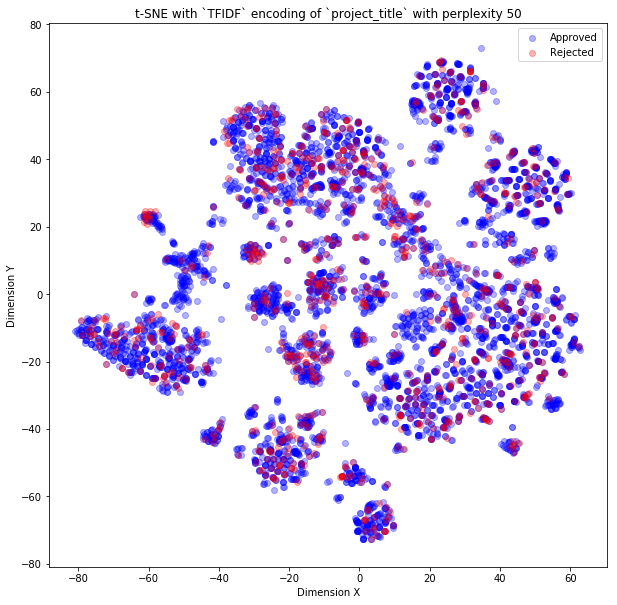

In [125]:
# Code took from original code provided
for_tsne = np.hstack((tfidf_X_embedding_50, class_label_data))
tfidf_tsne_df_50 = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
tsne_df_0 = tfidf_tsne_df_50[tfidf_tsne_df_50['Score']==0]
tsne_df_1 = tfidf_tsne_df_50[tfidf_tsne_df_50['Score']==1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_df_1['Dimension_x'], tsne_df_1['Dimension_y'], c='blue', label='Approved', alpha=0.3)
ax.scatter(tsne_df_0['Dimension_x'], tsne_df_0['Dimension_y'], c='red', label='Rejected', alpha=0.3)
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.legend()
ax.set_title('t-SNE with `TFIDF` encoding of `project_title` with perplexity 50')
plt.show()

**Observation:** This plot is similar to the previous one which has perplexity = 30. So This plot also doesn't give much seperation between Approved and Rejected points.

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [126]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [127]:
print(np.array(avg_w2v_titles).shape)

(109248, 300)


In [128]:
bow_w2v_X = hstack((categ_numer_data, avg_w2v_titles))
bow_w2v_X = bow_w2v_X.tocsr()[:6000, :]
bow_w2v_X = bow_w2v_X.todense()
print(bow_w2v_X.shape)

(6000, 401)


In [129]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

bow_w2v_X_embedding = tsne.fit_transform(bow_w2v_X)

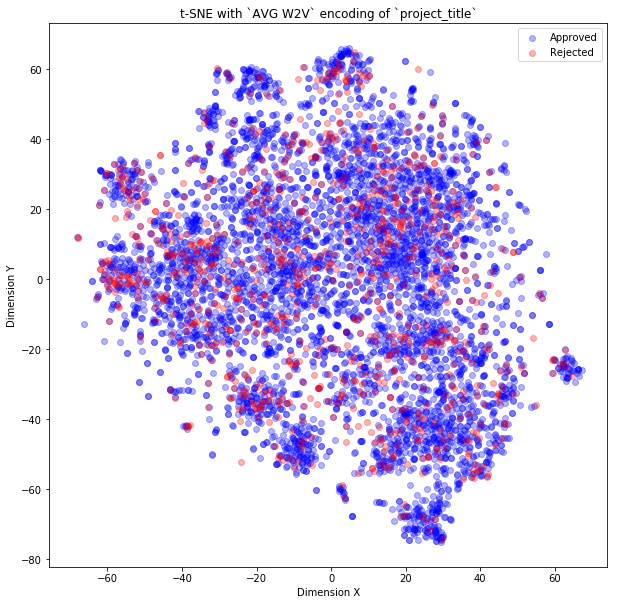

In [130]:
# Code took from original code provided
for_tsne = np.hstack((bow_w2v_X_embedding, class_label_data))
bow_w2v_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
tsne_df_0 = bow_w2v_tsne_df[bow_w2v_tsne_df['Score']==0]
tsne_df_1 = bow_w2v_tsne_df[bow_w2v_tsne_df['Score']==1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_df_1['Dimension_x'], tsne_df_1['Dimension_y'], c='blue', label='Approved', alpha=0.3)
ax.scatter(tsne_df_0['Dimension_x'], tsne_df_0['Dimension_y'], c='red', label='Rejected', alpha=0.3)
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.legend()
ax.set_title('t-SNE with `AVG W2V` encoding of `project_title`')
plt.show()

**Observation:** This plot also didn't give good results. Both approved and rejected projects are all over the place.

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [131]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [132]:
print(np.array(tfidf_w2v_titles).shape)

(109248, 300)


In [133]:
tfidf_w2v_X = hstack((categ_numer_data, avg_w2v_titles))
tfidf_w2v_X = tfidf_w2v_X.tocsr()[:6000, :]
tfidf_w2v_X = tfidf_w2v_X.todense()
print(tfidf_w2v_X.shape)

(6000, 401)


In [134]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

tfidf_w2v_X_embedding = tsne.fit_transform(tfidf_w2v_X)

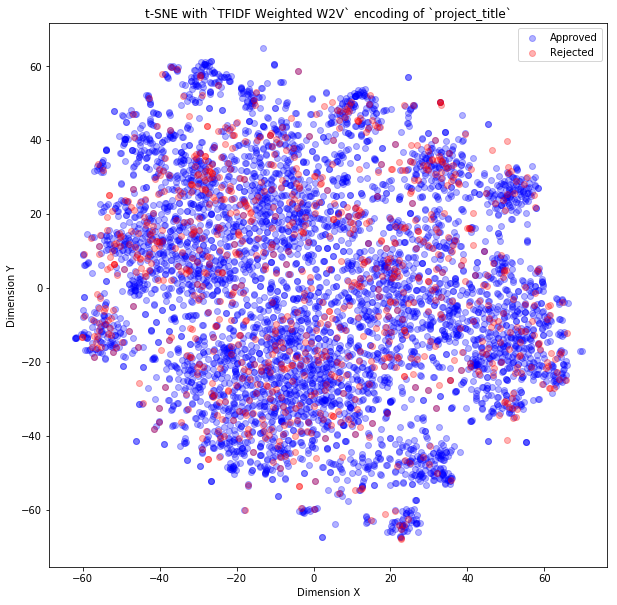

In [135]:
# Code took from original code provided
for_tsne = np.hstack((tfidf_w2v_X_embedding, class_label_data))
tfidf_w2v_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
tsne_df_0 = tfidf_w2v_tsne_df[tfidf_w2v_tsne_df['Score']==0]
tsne_df_1 = tfidf_w2v_tsne_df[tfidf_w2v_tsne_df['Score']==1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_df_1['Dimension_x'], tsne_df_1['Dimension_y'], c='blue', label='Approved', alpha=0.3)
ax.scatter(tsne_df_0['Dimension_x'], tsne_df_0['Dimension_y'], c='red', label='Rejected', alpha=0.3)
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.legend()
ax.set_title('t-SNE with `TFIDF Weighted W2V` encoding of `project_title`')
plt.show()

**Observation:** Didn't see much difference from others. Lot of overlap between approved and rejected projects.

<h2> 2.5 Summary </h2>

**Summary: There is not much difference between the word2vec plots. All the data points are spread all over irrespective of thier class label. But In BOW and tfidf plots we can see some clusters But they are not due to class labels. Which means we didnt get good visualizations as per class label point of view.<br>
May be the title didn't have much affect on the class label (and lot of columns are obtained from title column during text to vector conversion) and other features also didn't have <u>significant</u> affect on class label as we saw in univariate analysis.**